# Exploratory Data Analysis

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_squared_error, mean_squared_log_error 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures





In [2]:
# Importing the dataset
df_bike = pd.read_csv('train.csv', index_col=0, parse_dates=True)
df_bike_test = pd.read_csv('test.csv', index_col=0, parse_dates=True)

In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [4]:
df_bike.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
df_bike = df_bike.reset_index(level=0)
df_bike_test = df_bike_test.reset_index(drop=False)


df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
# Extract categorical data from datetime

In [9]:
import datetime
df_bike['month'] = df_bike['datetime'].dt.month_name()
df_bike['year']= df_bike['datetime'].dt.year
df_bike['day']= df_bike['datetime'].dt.day
df_bike['weekday']= df_bike['datetime'].dt.weekday
df_bike['hour'] = df_bike['datetime'].dt.hour
df_bike['date'] = df_bike['datetime'].dt.date

df_bike_test['month'] = df_bike_test['datetime'].dt.month_name()
df_bike_test['year']= df_bike_test['datetime'].dt.year
df_bike_test['day']= df_bike_test['datetime'].dt.day
df_bike_test['weekday']= df_bike_test['datetime'].dt.weekday
df_bike_test['hour'] = df_bike_test['datetime'].dt.hour
df_bike_test['date'] = df_bike_test['datetime'].dt.date



In [10]:
df_bike_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   month       6493 non-null   object        
 10  year        6493 non-null   int64         
 11  day         6493 non-null   int64         
 12  weekday     6493 non-null   int64         
 13  hour        6493 non-null   int64         
 14  date        6493 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(9), object(2)
memory usage: 761.

In [11]:
df_bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'month', 'year', 'day', 'weekday', 'hour', 'date'],
      dtype='object')

In [12]:
df_bike.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
month                 object
year                   int64
day                    int64
weekday                int64
hour                   int64
date                  object
dtype: object

In [13]:
df_bike_nodatetime = df_bike.drop(columns='datetime')
df_bike_test_nodatetime = df_bike_test.drop(columns='datetime')


In [14]:
df_bike.info()
df_bike_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  object        
 13  year        10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  weekday     10886 non-null  int64         
 16  hour        10886 non-

In [15]:
df_bike["year"] = pd.to_datetime(df_bike["year"])
df_bike["day"] = pd.to_datetime(df_bike["day"])
#df_bike["time"] = pd.to_datetime(df_bike["time"])
df_bike["date"] = pd.to_datetime(df_bike["date"])
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  object        
 13  year        10886 non-null  datetime64[ns]
 14  day         10886 non-null  datetime64[ns]
 15  weekday     10886 non-null  int64         
 16  hour        10886 non-

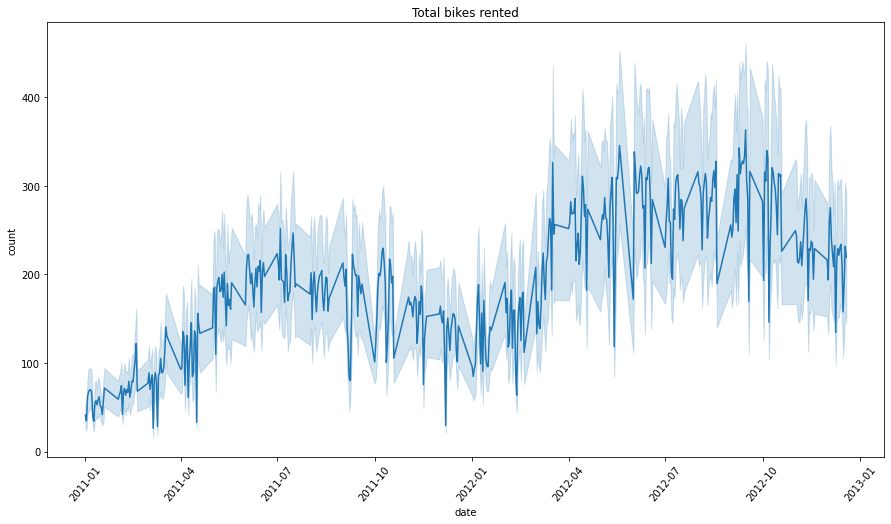

In [16]:
# Total bikes rented versus time
plt.figure(figsize=(15,8))
sns.lineplot(x=df_bike["date"], y=df_bike["count"], markers=True)

plt.xticks(rotation=50)
plt.ylabel('count')
plt.xlabel('date')

plt.title('Total bikes rented')

plt.show()


In [17]:
df_casual_registered = pd.DataFrame().assign(Date=df_bike['date'], Casual=df_bike['casual'], Registered=df_bike['registered'])

df_casual_registered.head()


,Date,Casual,Registered
0,2011-01-01,3,13
1,2011-01-01,8,32
2,2011-01-01,5,27
3,2011-01-01,3,10
4,2011-01-01,0,1


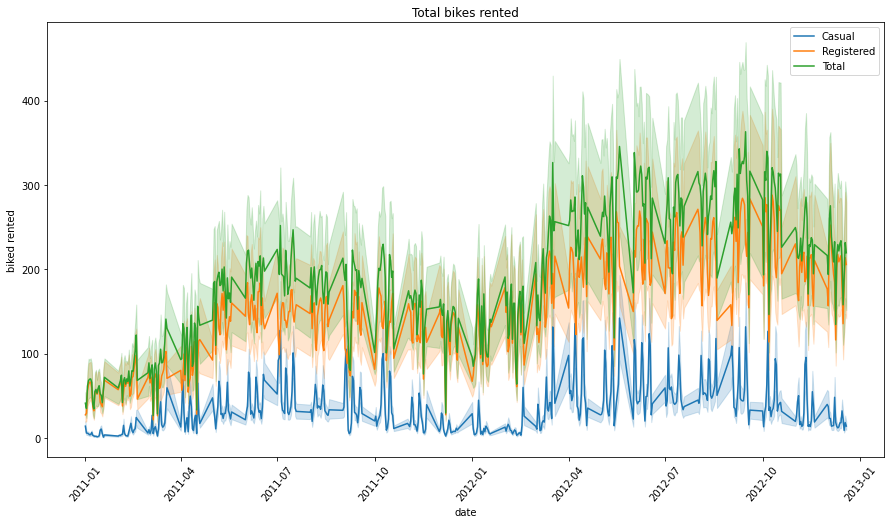

In [18]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df_bike["date"], y=df_bike["casual"], label="Casual", markers=False)
sns.lineplot(x=df_bike["date"], y=df_bike["registered"], label="Registered", markers=False)
sns.lineplot(x=df_bike["date"], y=df_bike["count"], label="Total", markers=False)
plt.xticks(rotation=50)
plt.legend()
plt.ylabel('biked rented')
plt.xlabel('date')

plt.title('Total bikes rented')

plt.show()


<AxesSubplot:>

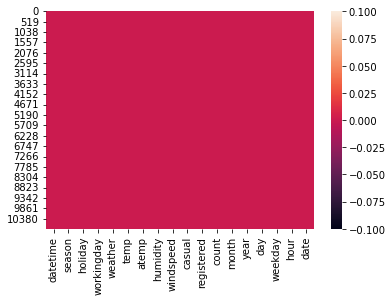

In [19]:
# Missing values
sns.heatmap(df_bike.isna())

<AxesSubplot:xlabel='hour'>

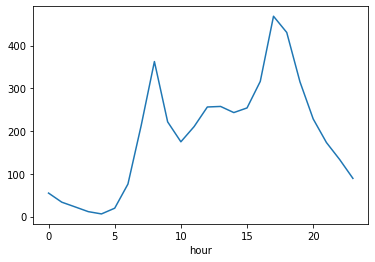

In [20]:
# Bike demand versus the hour
df_bike.groupby('hour')['count'].mean().plot()

<AxesSubplot:>

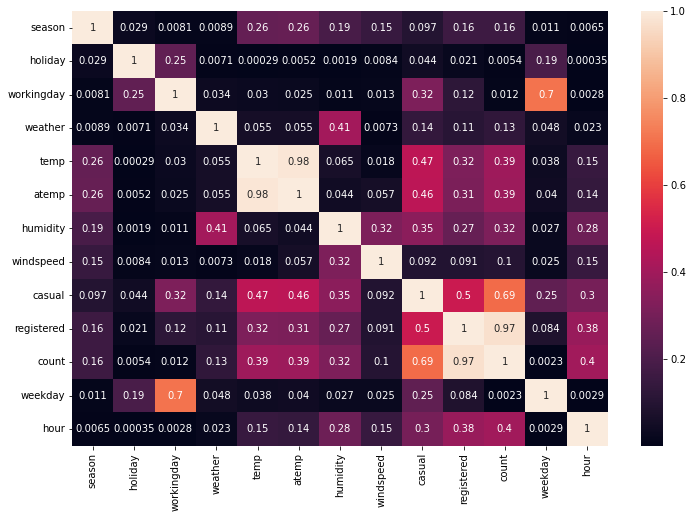

In [21]:
# strength of correlation: feature-feature, and feature-dependent variable
# using an absolute correlation as it is the magnitude of correlation, not direction, that we are interested in
plt.figure(figsize=(12,8))
sns.heatmap(df_bike.corr().abs(), annot=True)

# Train a linear regression model

In [22]:
X = df_bike_nodatetime[['temp', "humidity", "season", "windspeed", "weather", "holiday", "workingday", "hour", "month"]]
y = df_bike_nodatetime['count']



In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        10886 non-null  float64
 1   humidity    10886 non-null  int64  
 2   season      10886 non-null  int64  
 3   windspeed   10886 non-null  float64
 4   weather     10886 non-null  int64  
 5   holiday     10886 non-null  int64  
 6   workingday  10886 non-null  int64  
 7   hour        10886 non-null  int64  
 8   month       10886 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 765.5+ KB


In [24]:
# Train test split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Feature Engineering

In [25]:
transformer = ColumnTransformer(
[
    #('do_nothing', 'passthrough', ['season']),
    ("Encoder", OneHotEncoder(handle_unknown='ignore'), ["month", "season"]),
    ("Encoder_binary", OneHotEncoder(drop='if_binary'), ['holiday', "workingday"]),    
    ('poly', PolynomialFeatures(degree=6), ['temp', 'hour']),
    ("scaler1", StandardScaler(), ['temp']),
    ("scaler2", StandardScaler(), ['windspeed', 'humidity', 'hour']),
    
]
)

In [26]:
transformer

ColumnTransformer(transformers=[('Encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['month', 'season']),
                                ('Encoder_binary',
                                 OneHotEncoder(drop='if_binary'),
                                 ['holiday', 'workingday']),
                                ('poly', PolynomialFeatures(degree=6),
                                 ['temp', 'hour']),
                                ('scaler1', StandardScaler(), ['temp']),
                                ('scaler2', StandardScaler(),
                                 ['windspeed', 'humidity', 'hour'])])

In [27]:
#pd.DataFrame(transformer.fit_transform(X_train), columns=transformer.get_feature_names_out())

NameError: name 'y_train_log' is not defined

In [29]:
X_train_transformed = transformer.fit_transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed)
transformer.get_feature_names_out()

array(['Encoder__month_April', 'Encoder__month_August',
       'Encoder__month_December', 'Encoder__month_February',
       'Encoder__month_January', 'Encoder__month_July',
       'Encoder__month_June', 'Encoder__month_March',
       'Encoder__month_May', 'Encoder__month_November',
       'Encoder__month_October', 'Encoder__month_September',
       'Encoder__season_1', 'Encoder__season_2', 'Encoder__season_3',
       'Encoder__season_4', 'Encoder_binary__holiday_1',
       'Encoder_binary__workingday_1', 'poly__1', 'poly__temp',
       'poly__hour', 'poly__temp^2', 'poly__temp hour', 'poly__hour^2',
       'poly__temp^3', 'poly__temp^2 hour', 'poly__temp hour^2',
       'poly__hour^3', 'poly__temp^4', 'poly__temp^3 hour',
       'poly__temp^2 hour^2', 'poly__temp hour^3', 'poly__hour^4',
       'poly__temp^5', 'poly__temp^4 hour', 'poly__temp^3 hour^2',
       'poly__temp^2 hour^3', 'poly__temp hour^4', 'poly__hour^5',
       'poly__temp^6', 'poly__temp^5 hour', 'poly__temp^4 hour^2',


In [30]:
X_test_transformed = transformer.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed)
transformer.get_feature_names_out()

array(['Encoder__month_April', 'Encoder__month_August',
       'Encoder__month_December', 'Encoder__month_February',
       'Encoder__month_January', 'Encoder__month_July',
       'Encoder__month_June', 'Encoder__month_March',
       'Encoder__month_May', 'Encoder__month_November',
       'Encoder__month_October', 'Encoder__month_September',
       'Encoder__season_1', 'Encoder__season_2', 'Encoder__season_3',
       'Encoder__season_4', 'Encoder_binary__holiday_1',
       'Encoder_binary__workingday_1', 'poly__1', 'poly__temp',
       'poly__hour', 'poly__temp^2', 'poly__temp hour', 'poly__hour^2',
       'poly__temp^3', 'poly__temp^2 hour', 'poly__temp hour^2',
       'poly__hour^3', 'poly__temp^4', 'poly__temp^3 hour',
       'poly__temp^2 hour^2', 'poly__temp hour^3', 'poly__hour^4',
       'poly__temp^5', 'poly__temp^4 hour', 'poly__temp^3 hour^2',
       'poly__temp^2 hour^3', 'poly__temp hour^4', 'poly__hour^5',
       'poly__temp^6', 'poly__temp^5 hour', 'poly__temp^4 hour^2',


In [39]:
Predictor = LinearRegression()

In [40]:
Predictor.fit(X_train_transformed, y_train)

LinearRegression()

In [41]:
Predictor.score(X_train_transformed, y_train)

0.5594040759690149

In [42]:
Predictor.score(X_test_transformed, y_test)

0.5453400672912543

In [44]:
p = Predictor.predict(X_test_transformed)

In [45]:
p[
    p<0]

array([-3.00943196e+01, -5.87823189e+01, -4.40795560e+01, -4.56571951e+01,
       -4.67312689e+01, -9.51886250e+01, -2.65812906e+01, -1.10920131e+01,
       -5.01950075e+01, -4.52905604e+01, -1.61293794e+01, -7.18601440e+00,
       -2.43043016e+01, -3.72974722e+01, -3.43295355e+01, -1.09540634e+00,
       -5.64308941e+01, -1.07218010e+01, -1.35357635e+01, -6.62178554e+00,
       -4.69699655e+00, -2.54666542e+01, -1.79531236e+01, -1.48723522e+01,
       -3.42580231e+01, -7.72111451e-02, -4.03582971e+01, -1.10788199e+01,
       -1.74595665e+01, -2.51774045e+01, -8.56605827e+01, -5.43924570e+01,
       -7.45388506e+00, -1.38324472e+01, -2.91062770e+01, -2.55139973e+01,
       -4.12307066e+01, -2.13151073e+00, -7.36924274e-03, -3.54844660e-02,
       -3.15833880e+01, -2.50791958e+00, -2.83691056e+01, -1.27648776e+01,
       -3.36386673e+01, -3.01351329e+01, -4.78794297e+01, -5.07108393e+01,
       -2.78130788e+01, -1.11264471e+00, -2.73888575e+01, -1.47391598e+01,
       -2.82769733e+01, -

In [ ]:
# Generating and reverting log for predictions for test
#ypred_log_test = Predictor.predict(X_test_transformed)
#ypred_test = np.exp(ypred_log_test)-1

In [46]:
# Log transorming the target variable

y_train_log = np.log1p(y_train)

In [47]:
X_train.shape, X_test.shape, y_train_log.shape, y_test.shape

((8164, 9), (2722, 9), (8164,), (2722,))

In [48]:
Predictor.fit(X_train_transformed, y_train_log)

LinearRegression()

In [49]:
# Generating and reverting log for predictions for train
predictions = Predictor.predict(X_test_transformed)
predictions = np.exp(predictions)-1

In [52]:
predictions[predictions<0]

array([], dtype=float64)

In [50]:
# Predictor.score(X_test_transformed, np.log(y_test))

In [51]:
np.sqrt(mean_squared_log_error(y_test, predictions))

0.7289030918141005

In [54]:
print('Linear Regression results:')
print('Train R² score:', Predictor.score(X_train_transformed,y_train).round(3))
print('Test R² score:',Predictor.score(X_test_transformed,y_test).round(3))
print('MSE:',mean_squared_error(y_test, predictions).round(3))

Linear Regression results:
Train R² score: -1.054
Test R² score: -1.065
MSE: 16387.697


## Calculating Root Mean Squared Logarithmic Error (RMSLE)

In [55]:
mean_squared_log_error(y_test, predictions, sample_weight=None, multioutput='uniform_average', squared=True)

0.531299717256155

In [57]:
round(np.sqrt(mean_squared_log_error(y_test, predictions)),5)

0.7289

## Applying the model on the Kaggle dataset

In [61]:
datetime_data = df_bike_test['datetime']

actual_test_transformed = transformer.transform(df_bike_test)

predictions_test = Predictor.predict(actual_test_transformed)

In [63]:
predictions_test[predictions_test<0]

array([-1864.65118907, -1866.24572631, -1866.69225593, -1866.52516922,
       -1865.49373458, -1864.81080529, -1864.52382806, -1864.14348315,
       -1863.73036584, -1863.5420885 , -1863.35480263, -1863.35786635,
       -1863.15622814, -1863.10535577, -1863.00895957, -1863.0584593 ,
       -1862.98283877, -1863.03390256, -1862.93706096, -1862.98025719,
       -1863.63984172, -1863.95025288, -1864.35772682, -1864.586475  ,
       -1866.22780829, -1866.6063346 , -1866.41796972, -1865.90554946,
       -1865.33073947, -1864.79387812, -1864.10181994, -1863.68240923,
       -1863.53507086, -1863.23432323, -1863.17751714, -1863.07509332,
       -1863.00097521, -1863.03406201, -1862.94943258, -1862.83498123,
       -1862.78220066, -1862.79434921, -1863.07267712, -1863.22565076,
       -1863.42755226, -1863.82110579, -1864.28837359, -1864.56346937,
       -1866.19264055, -1866.67415087, -1866.52452521, -1865.48425468,
       -1864.87215598, -1864.42566664, -1863.97693411, -1863.71827109,
      

In [59]:
kaggle_df = pd.DataFrame(data=ypred_actual_test, index=datetime_data, columns=['count'])
kaggle_df
kaggle_df.to_csv('kaggle_submission')